# Group 12
### Members:
- DIZON, GAVIN RAINE R.
- PALMARES, ALYSSA JAYE L.
- TEE, GIANCARLO T.

## An Overview

The group would be working on a K-means clustering model for the Five Big Personality traits dataset. To give a brief overview of our task, the goal is to cluster the dataset based on the personality traits in the Big Five Personality Model or the Five-Factor model. The Big Five Personality Model or the Five-Factor Model is used for grouping or clustering people based on personality traits. The model uses common descriptors of common languages. This test is mainly used for career assessment since this gives people more insight in how they react in different situations. In addition, this test uses the Big-Five Factor Markers from the International Personality Item Pool, developed by Goldberg. These are commonly used to describe the human personality and psyche.

## OCEAN or Five Factor Makers

1. **Extraversion (or Extroversion)** which can be identified as someone who gets motivated or energized in the company of others.

2. **Emotional Stability or Neuroticism** is a physical and emotional response to stress and perceived threats in someone’s daily life. This is mostly characterized by sadness or moodiness.
3. **Agreeableness** - these people tend to have high or prosocial behaviors. Moreover, People who exhibit high agreeableness will show signs of trust, altruism, kindness, and affection
4. **Conscientiousness** - includes having high levels of thoughtfulness, good impulse control, and goal-directed behaviors
5. **Openness** - These people are eager to learn and experience new things. They are imaginative and insightful.


### Importing needed libraries

In [1]:
#import sys
#!{sys.executable} -m pip install yellowbrick

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (silhouette_score, calinski_harabasz_score, davies_bouldin_score)
np.random.seed(0)

## Initializing Functions to be used later

In [3]:
# For visualization
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(15,35))
    for i in range(1, 11):
        plt.subplot(10,3,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=14)

def compare_two_graphs(groupname, questions, arr1, arr2 , grp1_name, grp2_name):
    plt.figure(figsize=(15, 35))
    labels = ["Cluster 0", "Cluster 1", "Cluster 2", "Cluster 3", "Cluster 4", "Population"]    
    for i in range(0, len(arr1)):
        plt.subplot(10, 3, i+1)
        height = np.append(arr1[i], arr2[i])
        plt.bar(labels, height=height, color=["blue","blue","blue","blue", "blue", "green"], width = 0.4)
        plt.title(questions[groupname[i-1]], fontsize=14)

## Explaining, Loading, and Preprocessing Data

The data was collected through an online interactive personality test from 2016-2018. This survey was made by the International Personality Item Pool (IPIP). Participants were informed and asked for consent that the data will be recorded and used for research. 

In total, there are `50` questions wherein 10 of which are allotted to a specific factor maker. In the dataset, the questions were labeld as follows:

<body>
<style> 
table td, table th, table tr {text-align:left !important;}
</style>

<table style="text-align: left; float:left;">
    <tr>
        <th>Extroversion</th>
        <th>Emotional Stability</th>
        <th>Agreeableness</th>
        <th>Conscientiousness</th>
        <th>Openness</th>
    </tr>
    <tr>
        <td><b>EXT1</b> I am the life of the party.</td>
        <td><b>EST1</b> I get stressed out easily.</td>
        <td><b>AGR1</b> I feel little concern for others.</td>
        <td><b>CSN1</b> I am always prepared.</td>
        <td><b>OPN1</b> I have a rich vocabulary.</td>
    </tr>
    <tr>
        <td><b>EXT2</b> I don't talk a lot.</td>
        <td><b>EST2</b> I am relaxed most of the time.</td>
        <td><b>AGR2</b> I am interested in people.</td>
        <td><b>CSN2</b> I leave my belongings around.</td>
        <td><b>OPN2</b> I have difficulty understanding abstract ideas.</td>
    </tr>
    <tr>
        <td><b>EXT2</b> I don't talk a lot.</td>
        <td><b>EST2</b> I am relaxed most of the time.</td>
        <td><b>AGR2</b> I am interested in people.</td>
        <td><b>CSN2</b> I leave my belongings around.</td>
        <td><b>OPN2</b> I have difficulty understanding abstract ideas.</td>
    </tr>
    <tr>
        <td><b>EXT3</b> I feel comfortable around people.</td>
        <td><b>EST3</b> I worry about things.</td>
        <td><b>AGR3</b> I insult people.</td>
        <td><b>CSN3</b> I pay attention to details.</td>
        <td><b>OPN3</b> I have a vivid imagination.</td>
    </tr>
    <tr>
        <td><b>EXT4</b> I keep in the background.</td>
        <td><b>EST4</b> I seldom feel blue.</td>
        <td><b>AGR4</b> I sympathize with others' feelings.</td>
        <td><b>CSN4</b> I make a mess of things.</td>
        <td><b>OPN4</b> I am not interested in abstract ideas.</td>
    </tr>
    <tr>
        <td><b>EXT5</b> I start conversations.</td>
        <td><b>EST5</b> I am easily disturbed.</td>
        <td><b>AGR5</b> I am not interested in other people's problems.</td>
        <td><b>CSN5</b> I get chores done right away.</td>
        <td><b>OPN5</b> I have excellent ideas.</td>
    </tr>
    <tr>
        <td><b>EXT6</b> I have little to say.</td>
        <td><b>EST6</b> I get upset easily.</td>
        <td><b>AGR6</b> I have a soft heart.</td>
        <td><b>CSN6</b> I often forget to put things back in their proper place.</td>
        <td><b>OPN6</b> I do not have a good imagination.</td>
    </tr>
    <tr>
        <td><b>EXT7</b> I talk to a lot of different people at parties.</td>
        <td><b>EST7</b> I change my mood a lot.</td>
        <td><b>AGR7</b> I am not really interested in others.</td>
        <td><b>CSN7</b> I like order.</td>
        <td><b>OPN7</b> I am quick to understand things.</td>
    </tr>
    <tr>
        <td><b>EXT8</b> I don't like to draw attention to myself.</td>
        <td><b>EST8</b> I have frequent mood swings.</td>
        <td><b>AGR8</b> I take time out for others.</td>
        <td><b>CSN8</b> I shirk my duties.</td>
        <td><b>OPN8</b> I use difficult words.</td>
    </tr>
    <tr>
        <td><b>EXT9</b> I don't mind being the center of attention.</td>
        <td><b>EST9</b> I get irritated easily.</td>
        <td><b>AGR9</b> I feel others' emotions.</td>
        <td><b>CSN9</b> I follow a schedule.</td>
        <td><b>OPN9</b> I spend time reflecting on things.</td>
    </tr>
    <tr>
        <td><b>EXT10</b> I am quiet around strangers.</td>
        <td><b>EST10</b> I often feel blue.</td>
        <td><b>AGR10</b> I make people feel at ease.</td>
        <td><b>CSN10</b> I am exacting in my work.</td>
        <td><b>OPN10</b> I am full of ideas.</td>
    </tr>
</table>   
</body>

Another columns present in the given dataset are the `country` where the survey was answered, `IPC` or the number of users that share the same IP address when taking the test, and the screen size used when taking the test. There are also columns which measures the time they spent on a single question, the start page, and the end page.

### Removing Unused Columns and Rows with Missing Data

Since the only valid data from the dataset are the tables related to the survey such as columns containing Personality related questions like  (EXT, EST , AGR, CSN, and OPN) and the IPC, the other unrelated columns are truncated. The rows with missing values are also dropped.

In [4]:
data = pd.read_csv('data/data-final.csv', sep='\t')
pd.options.display.max_columns = 150

# drop unused columns
data.drop(data.columns[50:], axis=1, inplace=True)

print('How many missing values? ', data.isnull().values.sum())
# drop any rows with missing values.
data.dropna(inplace=True)
print('Number of participants: ', len(data))
data.head()

How many missing values?  89150
Number of participants:  1013558


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0


### Removing zeroes and zero-centering data
We then remove the zeros from the data as they signify that the person who answered skipped a question or multiple questions. We also zero-center the data to better visualize the respondent's answers by subtracting their answer by 3, which means they are neutral according to the Likert scale. Strongly agree will now be represented as `2`, and strongly disagree is now `-2`. 

In [5]:
# dropping rows with zeros
data = data[(data != 0).all(1)]

# Subtract 3 pre-processing
data = data.apply(lambda x: x - 3)
print('Number of participants: ', len(data))
data.head()

Number of participants:  874434


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1.0,-2.0,2.0,-1.0,2.0,-2.0,2.0,-1.0,1.0,-2.0,-2.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,2.0,-1.0,1.0,-1.0,0.0,-1.0,1.0,0.0,1.0,0.0,1.0,0.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,2.0,-2.0,1.0,-2.0,1.0,-2.0,2.0,0.0,1.0,2.0
1,0.0,2.0,0.0,1.0,0.0,0.0,-1.0,2.0,-2.0,2.0,-1.0,0.0,1.0,-2.0,0.0,-2.0,-1.0,-2.0,0.0,-2.0,-2.0,1.0,-2.0,2.0,-2.0,2.0,0.0,1.0,2.0,0.0,0.0,-1.0,2.0,0.0,0.0,-2.0,0.0,0.0,2.0,0.0,-2.0,-1.0,1.0,-1.0,0.0,-2.0,1.0,-1.0,2.0,0.0
2,-1.0,0.0,1.0,1.0,0.0,-1.0,-2.0,0.0,-1.0,2.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-2.0,0.0,-2.0,1.0,-2.0,1.0,-1.0,1.0,-2.0,1.0,1.0,0.0,1.0,-1.0,-1.0,-1.0,0.0,0.0,1.0,-1.0,1.0,-1.0,2.0,-2.0,-1.0,-2.0,1.0,-1.0,2.0,0.0,1.0,1.0
3,-1.0,-1.0,-1.0,0.0,1.0,-1.0,-1.0,1.0,-2.0,1.0,0.0,0.0,0.0,-1.0,0.0,-1.0,-1.0,-1.0,1.0,0.0,-1.0,1.0,0.0,1.0,-1.0,1.0,-1.0,1.0,0.0,1.0,-1.0,1.0,1.0,1.0,-2.0,-1.0,-1.0,0.0,-2.0,1.0,1.0,-1.0,2.0,-1.0,0.0,-2.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,1.0,-2.0,2.0,2.0,0.0,-2.0,-2.0,-2.0,-2.0,0.0,-1.0,-2.0,2.0,-2.0,2.0,-2.0,0.0,-2.0,2.0,2.0,0.0,2.0,-2.0,2.0,-2.0,0.0,-2.0,2.0,-2.0,2.0,2.0,2.0,-2.0,2.0,-2.0,2.0,-2.0,2.0,0.0,2.0,2.0


## Initializing Variables for Visualization

In [6]:
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'
}


EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]



# Exploratory Data Analysis (EDA)

## Data Visualization

Here, we show the number of respondents and their answers for each questions for each personality makers. 

Q&As Related to Extroversion Personality


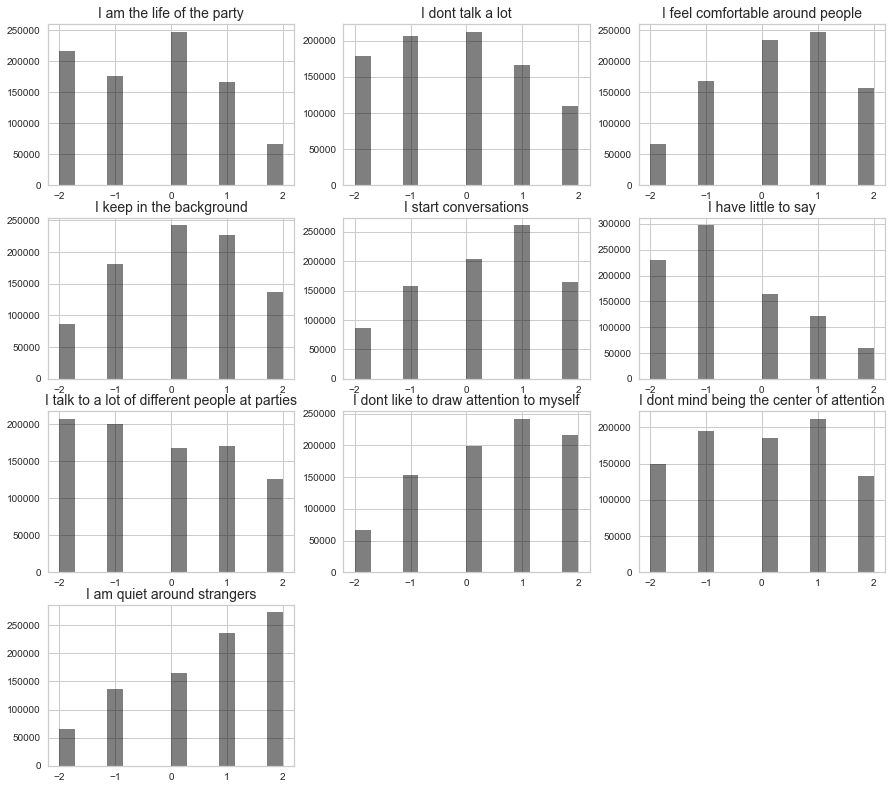

In [7]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'black')

Q&As Related to Emotional Stability Personality


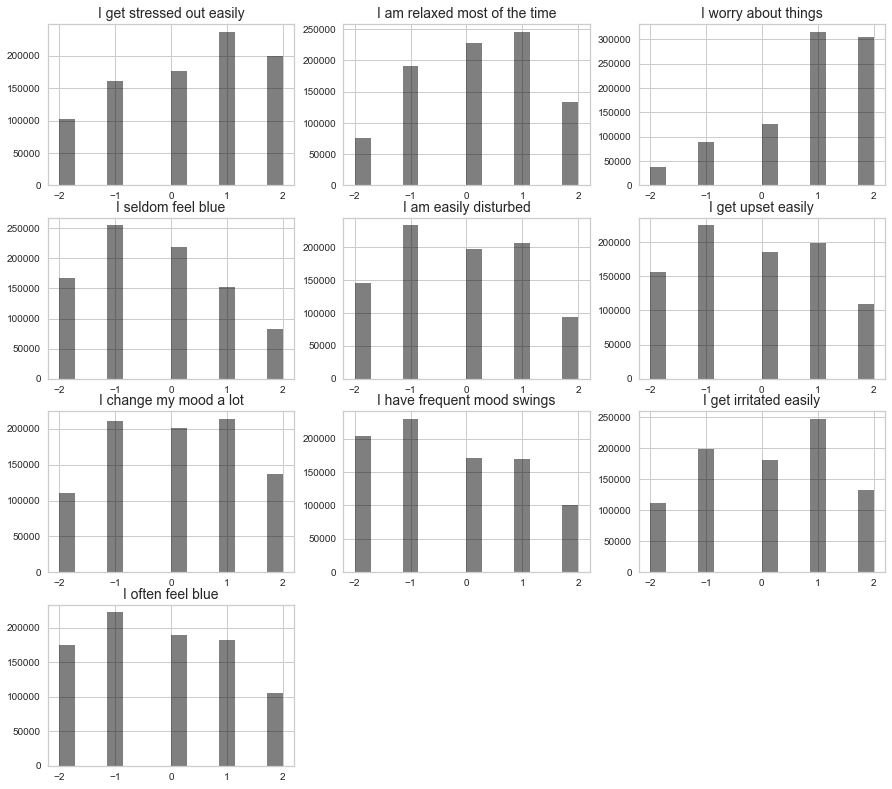

In [8]:
print('Q&As Related to Emotional Stability Personality')
vis_questions(EST, est_questions, 'black')

Q&As Related to Agreeableness Personality


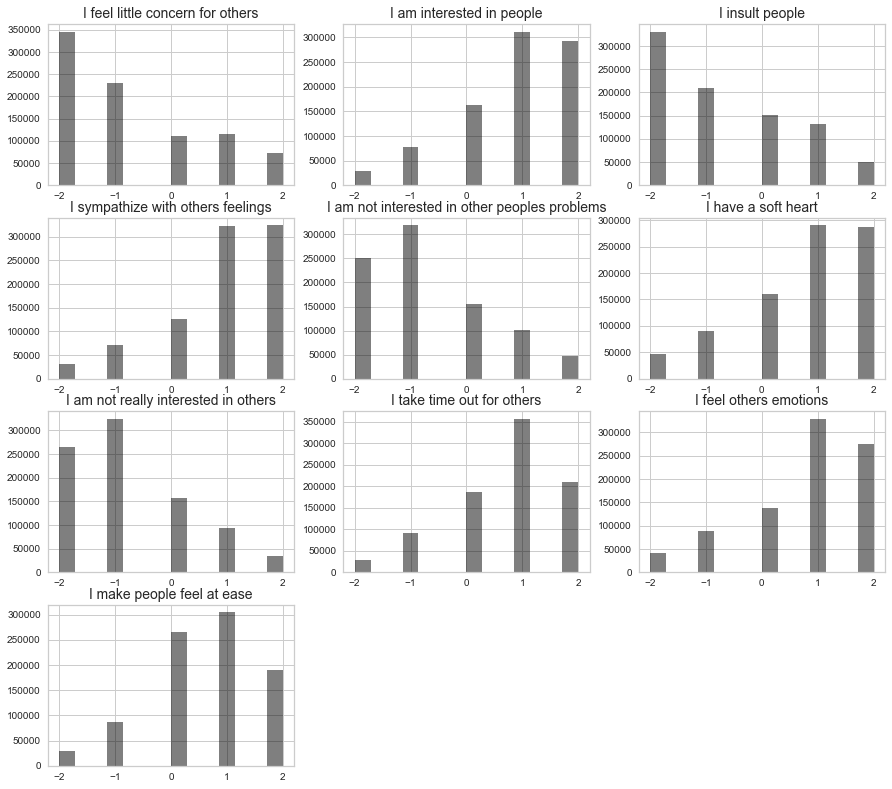

In [9]:
print('Q&As Related to Agreeableness Personality')
vis_questions(AGR, agr_questions, 'black')

Q&As Related to Conscentiousness Personality


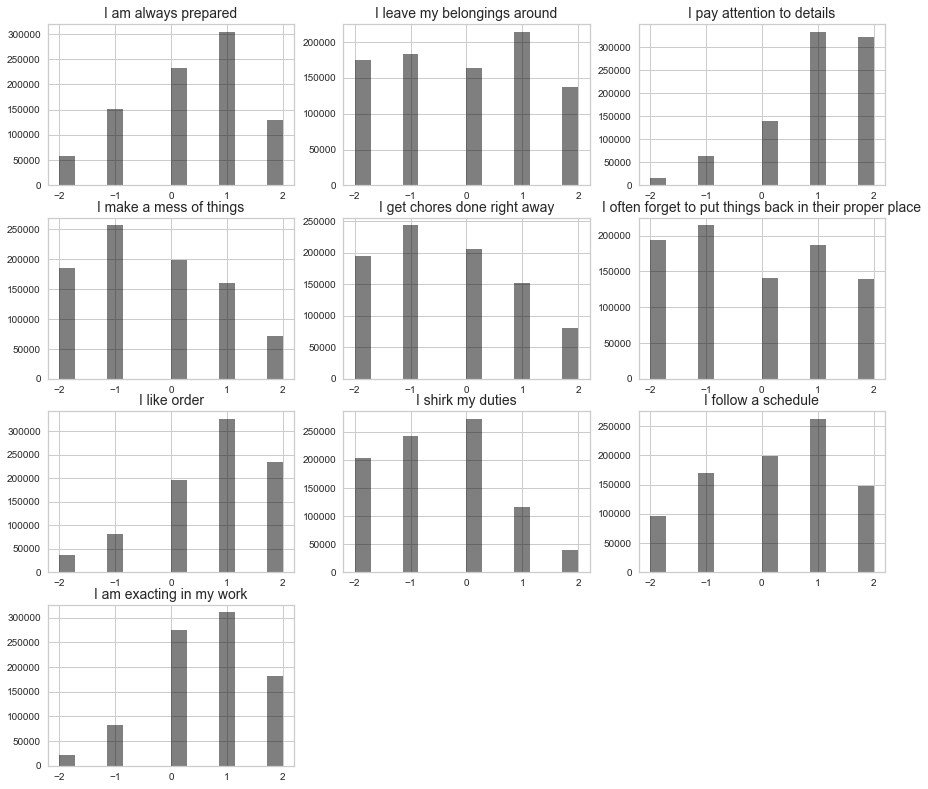

In [10]:
print('Q&As Related to Conscentiousness Personality')
vis_questions(CSN, csn_questions, 'black')

Q&As Related to Openness Personality


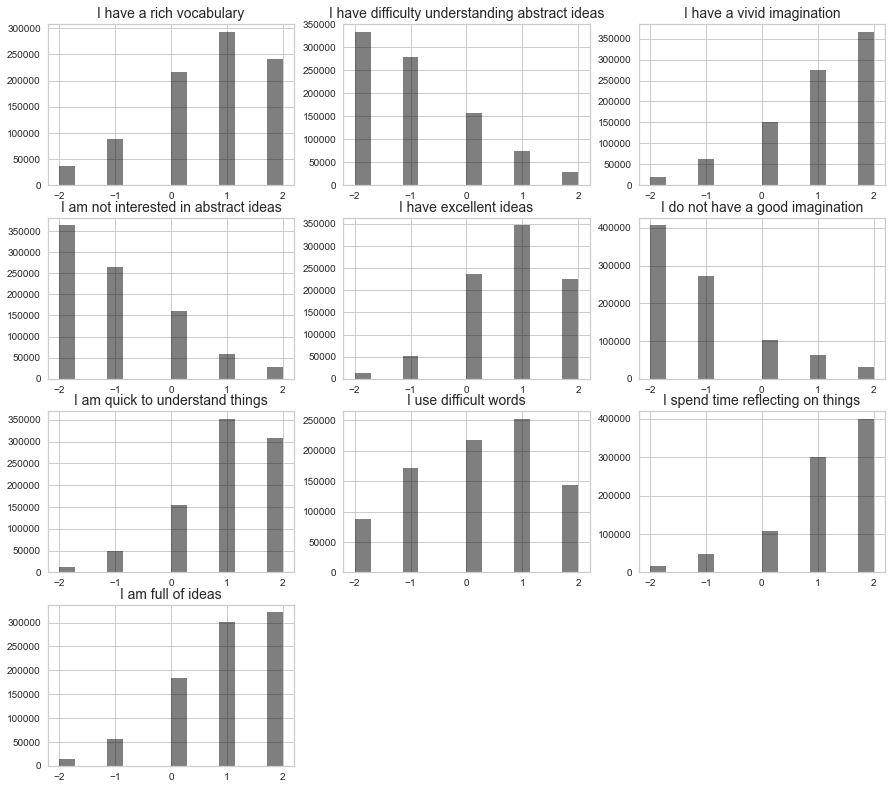

In [11]:
print('Q&As Related to Openness Personality')
vis_questions(OPN, opn_questions, 'black')

In [12]:
#ADD MORE EDA HERE


# The Task

The main task is to create clusters with the given data. The main problem with these kind of dataset is that there is no exact `label` that we can use to create the clustering. There are unsupervised machine learning models that handle this situation but for this experiment, we will be using the **K-Means cluster**.


> K-means cluster is an iterative algorithm that divides an unlabeled dataset into *k* different clusters in such a way that each row in the dataset belongs only to one group that has similar properties or `features`. 

Similar, to the K-nearest neighbor algorithm, this algorithm makes use of a centroid where each cluster is associated with it. Since we will be evaulating the five personality makers, we will be setting our number of clusters `k` to 5.

In [13]:
df = data

kmeans = KMeans(n_clusters=5, random_state=42)
k_fit = kmeans.fit(df)
predictions = k_fit.labels_

# Create a new column of clusters to predict the data
df['Cluster'] = predictions

### Analysis

Now, we get the mean of each of the personality makers for each clusters. 

In [14]:
col_list = list(df)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df[ext].sum(axis=1)/10
data_sums['neurotic'] = df[est].sum(axis=1)/10
data_sums['agreeable'] = df[agr].sum(axis=1)/10
data_sums['conscientious'] = df[csn].sum(axis=1)/10
data_sums['open'] = df[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,0.056924,0.002474,0.196797,0.162672,0.238746
1,-0.029237,0.661793,0.159720,0.181235,0.250729
2,-0.000650,-0.373468,-0.049670,0.029345,0.254352
3,0.089027,-0.575071,0.213737,0.114225,0.337086
4,0.074541,0.432144,0.306913,0.220076,0.366751


## Principal Component Analysis

**Prinicipal Component analysis (PCA)** is a dimensionality-reduction method used to reduce dimensionality (or features) of large datasets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. However, dimensionality-reduction would have a minimal trade-off to the accuracy of the result. Here, we use PCA to visualize the personality clusters. To do this, we will be reducing the features from 50 (the number of questions) to 2 `n_components`. This is for us to visualize the graph in a 2D-plane.

In [15]:
#PCA?

In [16]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions

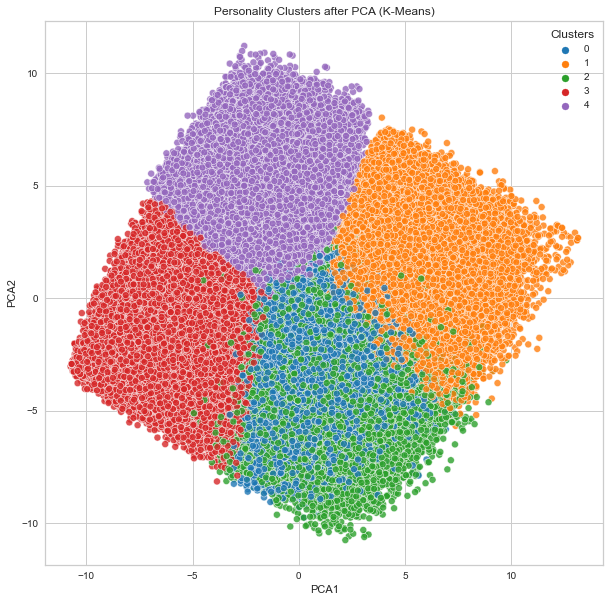

In [17]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA (K-Means)');

## Finding an optimum number of groups


### Elbow
The question now is is the value `5` the best `k` for the clustering given the data. `KElbowVisualizer` is used to find an optimal number  of clusters for k-means clustering using the "elbow" method. Here, we pass a range of k's to evaluate. Once we fit this to the data we can make use of its attribute, the elbow value which is the optimum value.

In [18]:
#KElbowVisualizer?
# Elbow Method - (check)
# Gap Statistics - (wala pa) 

In [19]:
df_opt = data.drop('Cluster', axis=1)

columns = list(df_opt.columns)
#columns.remove('Cluster')

scaler = MinMaxScaler(feature_range=(0,1))
df_opt = scaler.fit_transform(df_opt)
df_opt = pd.DataFrame(df_opt, columns=columns)
visualizer = KElbowVisualizer(KMeans(verbose=1), k=(2,8))

In [20]:

visualizer.elbow_value_

With the graph shown above, we can prove that `5` is the most optimal number for clustering the dataset. Now let's try to find the optimum number with the `Gap Statistics` method.


### Gap Statistics

# Alternative Models

Other than the usual K-means cluster approach, there are also alternative methods that we can use to cluster an unlabeled dataset. 

## Batch K-Means

Mini-Batch K-Means uses small, random fixed-size batch of data to store in memory and with each iteration, a random sample of the data will be collected and used in updating the clusters.


In [21]:
MiniBatchKMeans?

In [22]:
df_mb = data

mbKMeans = MiniBatchKMeans(n_clusters=5, max_iter=500, verbose=1, random_state=42)
mbKMeans.fit(df_mb)

# Create a new column of clusters to predict the data
df_mb['Cluster'] = mbKMeans.labels_

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


Init 1/3 with method: k-means++
Inertia for init 1/3: 17685.308395
Init 2/3 with method: k-means++
Inertia for init 2/3: 17818.400483
Init 3/3 with method: k-means++
Inertia for init 3/3: 17218.406309
Minibatch iteration 1/4372500: mean batch inertia: 55.661550, ewa inertia: 55.661550 
Minibatch iteration 2/4372500: mean batch inertia: 59.843594, ewa inertia: 55.662507 
Minibatch iteration 3/4372500: mean batch inertia: 60.564724, ewa inertia: 55.663628 
Minibatch iteration 4/4372500: mean batch inertia: 58.813310, ewa inertia: 55.664349 
Minibatch iteration 5/4372500: mean batch inertia: 55.114335, ewa inertia: 55.664223 
Minibatch iteration 6/4372500: mean batch inertia: 56.190514, ewa inertia: 55.664343 
Minibatch iteration 7/4372500: mean batch inertia: 58.920701, ewa inertia: 55.665088 
Minibatch iteration 8/4372500: mean batch inertia: 57.599328, ewa inertia: 55.665530 
Minibatch iteration 9/4372500: mean batch inertia: 53.738915, ewa inertia: 55.665090 
Minibatch iteration 10/43

### Get Mean

In [23]:
col_list = list(df_mb)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums_mb = pd.DataFrame()
data_sums_mb['extroversion'] = df_mb[ext].sum(axis=1)/10
data_sums_mb['neurotic'] = df_mb[est].sum(axis=1)/10
data_sums_mb['agreeable'] = df_mb[agr].sum(axis=1)/10
data_sums_mb['conscientious'] = df_mb[csn].sum(axis=1)/10
data_sums_mb['open'] = df_mb[opn].sum(axis=1)/10
data_sums_mb['clusters'] = mbKMeans.labels_
data_sums_mb.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,0.043024,0.536656,0.316277,0.236543,0.387927
1,0.048730,0.128406,0.081150,0.130364,0.276785
2,0.086775,-0.537104,0.203934,0.112117,0.335948
3,0.046970,0.069185,0.206798,0.192666,0.273182
4,-0.013349,0.185133,0.062806,0.084403,0.200986


### Computing the PCA

In [24]:
pca_mb = PCA(n_components=2)
pca_mb_fit = pca_mb.fit_transform(df_mb)

df_pca_mb = pd.DataFrame(data=pca_mb_fit, columns=['PCA1', 'PCA2'])
df_pca_mb['Clusters'] = mbKMeans.labels_
# TSNE

### Visualizing the Model

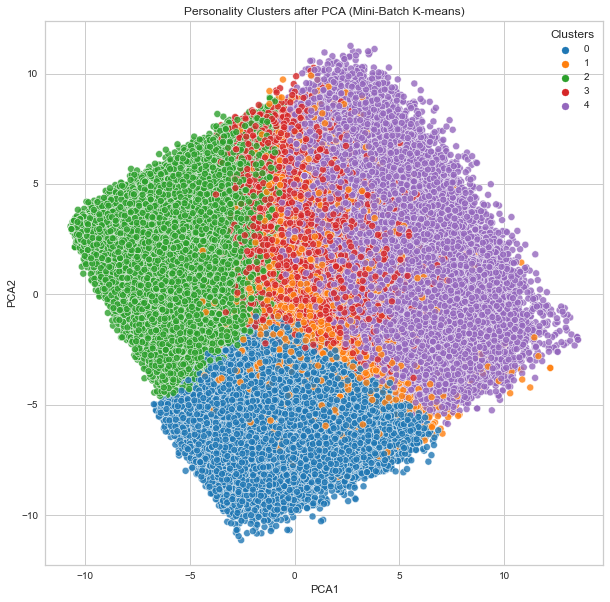

In [25]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca_mb, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA (Mini-Batch K-means)');

## Gaussian Mixture Model

explain

In [26]:
df_gmm = data

gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(df_gmm)

# Create a new column of clusters to predict the data
df_gmm['Cluster'] = gmm.predict(df_gmm)

### Get Mean

explain

In [27]:
col_list = list(df_gmm)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums_gmm = pd.DataFrame()
data_sums_gmm['extroversion'] = df_gmm[ext].sum(axis=1)/10
data_sums_gmm['neurotic'] = df_gmm[est].sum(axis=1)/10
data_sums_gmm['agreeable'] = df_gmm[agr].sum(axis=1)/10
data_sums_gmm['conscientious'] = df_gmm[csn].sum(axis=1)/10
data_sums_gmm['open'] = df_gmm[opn].sum(axis=1)/10
data_sums_gmm['clusters'] = df_gmm['Cluster']
data_sums_gmm.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,0.024381,0.371139,0.216557,0.187486,0.346075
1,-0.010029,0.187556,0.064228,0.089247,0.208100
2,0.082492,-0.536851,0.199573,0.110422,0.338260
3,0.114340,0.277121,0.267728,0.197860,0.298934
4,0.042802,0.066142,0.200091,0.191693,0.275012


### Computing for the PCA

In [28]:
pca_gmm = PCA(n_components=2)
pca_gmm_fit = pca_mb.fit_transform(df_gmm)

df_pca_gmm = pd.DataFrame(data=pca_gmm_fit, columns=['PCA1', 'PCA2'])
df_pca_gmm['Clusters'] = list(df_gmm['Cluster'])

### Visualizing the Clusters with PCA

explain

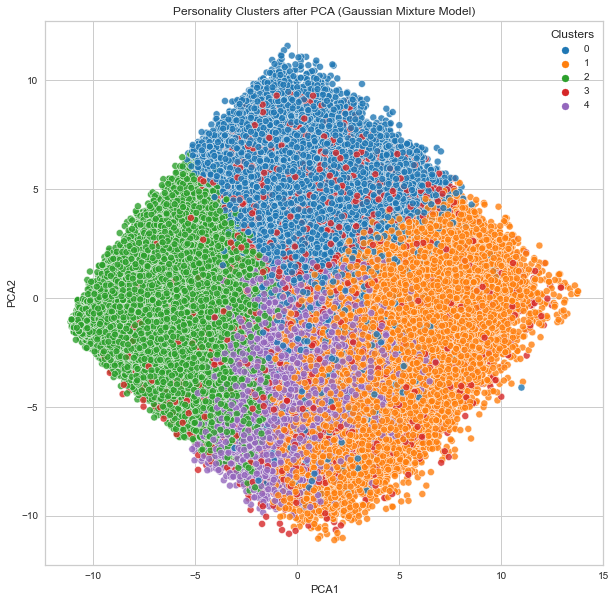

In [29]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca_gmm, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA (Gaussian Mixture Model)');

### Validating and Evaluating the Clusters

In [30]:
# remove column cluster
col = list(df_pca.columns)
col.remove("Clusters")
col

df_eval = pd.DataFrame(columns=["Model", "Calinski-Harabasz", "Davies_Bouldin", "Silhouette"])
print("Computing Scores in K-Means...")
df_eval.loc[len(df_eval.index)]= ["K-means", calinski_harabasz_score(df_pca[col], df_pca['Clusters']), davies_bouldin_score(df_pca[col], df_pca['Clusters']), silhouette_score(df_pca[col], df_pca['Clusters'], metric='euclidean', sample_size=100000)] 
print("Computing Scores in Mini-Batch K-means...")
df_eval.loc[len(df_eval.index)]= ["Mini-Batch K-means", calinski_harabasz_score(df_pca_mb[col], df_pca_mb['Clusters']), davies_bouldin_score(df_pca_mb[col], df_pca_mb['Clusters']), silhouette_score(df_pca_mb[col], df_pca_mb['Clusters'], metric='euclidean', sample_size=100000)] 
print("Computing Scores in Gaussian Mixture Model...")
df_eval.loc[len(df_eval.index)]= ["Gaussian Mixture Model", calinski_harabasz_score(df_pca_gmm[col], df_pca_gmm['Clusters']), davies_bouldin_score(df_pca_gmm[col], df_pca_gmm['Clusters']), silhouette_score(df_pca_gmm[col], df_pca_gmm['Clusters'], metric='euclidean', sample_size=100000)] 

Computing Scores in K-Means...
Computing Scores in Mini-Batch K-means...
Computing Scores in Gaussian Mixture Model...


In [31]:
df_eval

,Model,Calinski-Harabasz,Davies_Bouldin,Silhouette
0,K-means,486514.639512,5.440337,0.243725
1,Mini-Batch K-means,326161.490762,1.952691,0.160949
2,Gaussian Mixture Model,231690.873994,2.283497,0.124364


## Analysis

Among the three models, the **- Model** that produced the best clustering of data. However in this experiment, we will be analyzing the results from th K-means clustering.

In [32]:
df_cluster = df.groupby('Cluster').mean()

Extroversion Questions: Cluster Mean vs Population Mean comparison


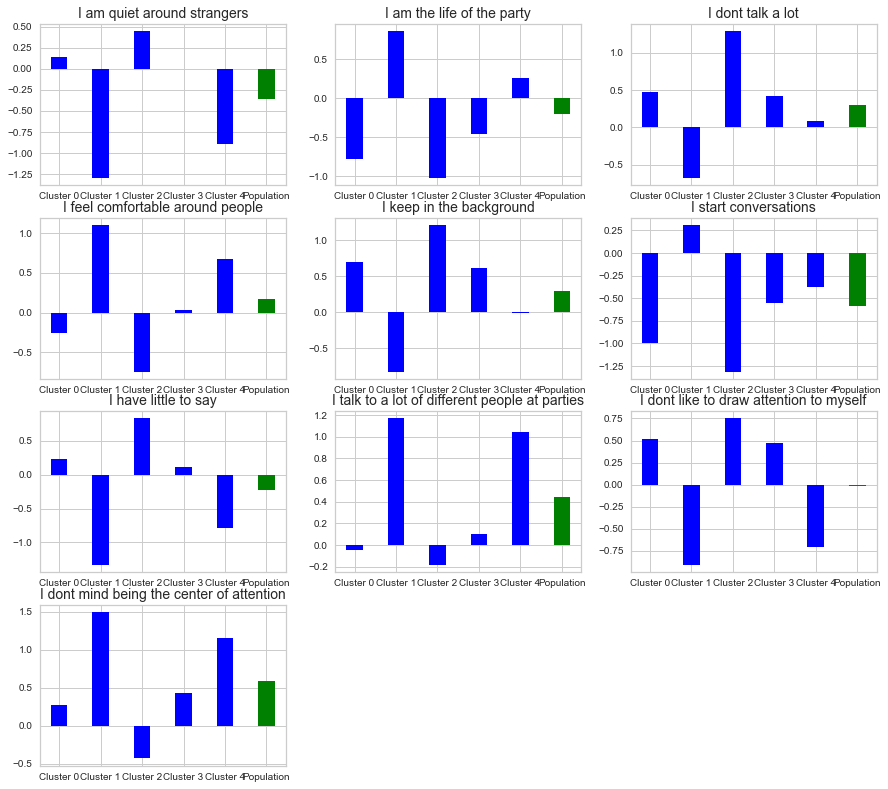

In [33]:
EXT_df_cluster = [column for column in df_cluster if column.startswith('EXT')]
print("Extroversion Questions: Cluster Mean vs Population Mean comparison")
compare_two_graphs(EXT, ext_questions, df_cluster[EXT_df_cluster].values.transpose(), df[EXT_df_cluster].mean().transpose(), "Cluster ", "Population Mean")

Emotional Stability Questions: Cluster Mean vs Population Mean comparison


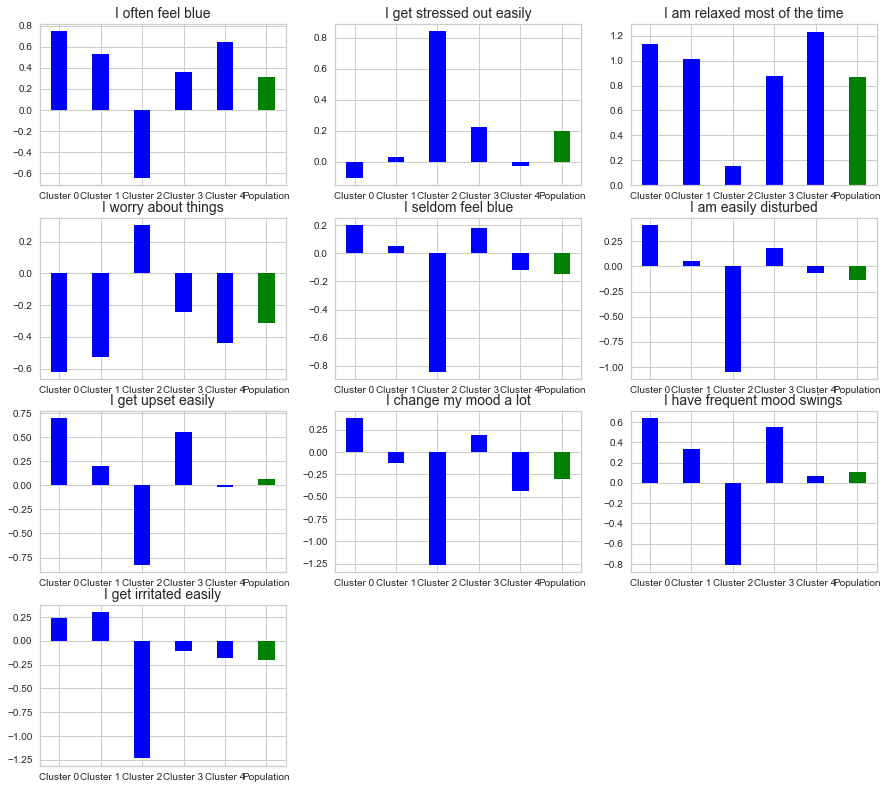

In [34]:
EST_df_cluster = [column for column in df_cluster if column.startswith('EST')]
print("Emotional Stability Questions: Cluster Mean vs Population Mean comparison")
compare_two_graphs(EST, est_questions, df_cluster[EST_df_cluster].values.transpose(), df[EST_df_cluster].mean().transpose(), "Cluster ", "Population Mean")

Conscientiousness Questions: Cluster Mean vs Population Mean comparison


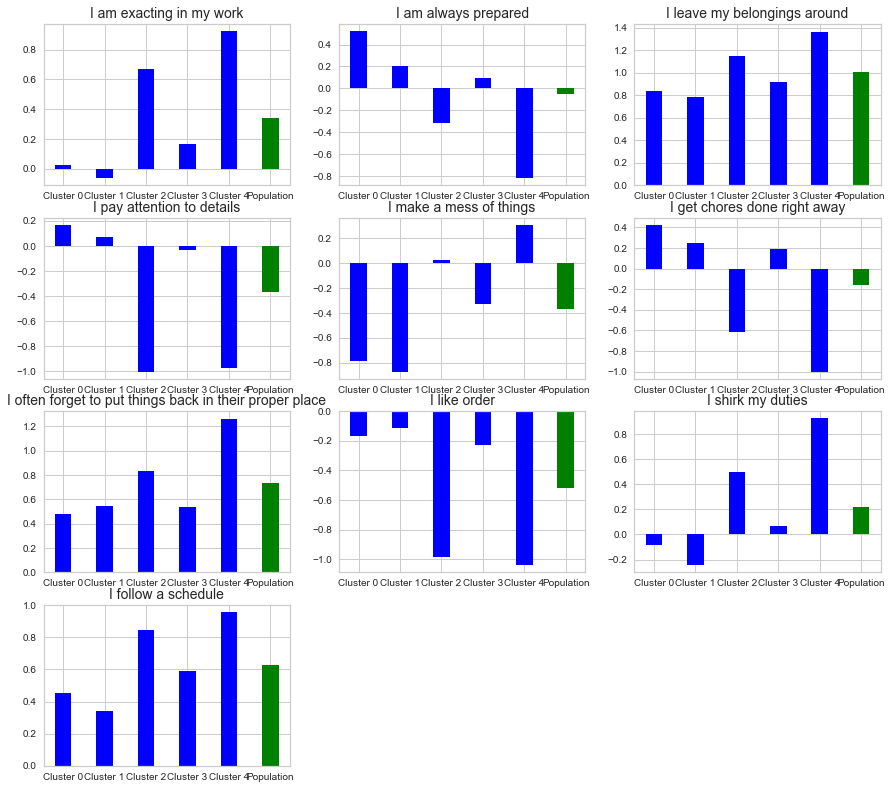

In [35]:
CSN_df_cluster = [column for column in df_cluster if column.startswith('CSN')]
print("Conscientiousness Questions: Cluster Mean vs Population Mean comparison")
compare_two_graphs(CSN, csn_questions, df_cluster[CSN_df_cluster].values.transpose(), df[CSN_df_cluster].mean().transpose(), "Cluster ", "Population Mean")

Agreeableness Questions: Cluster Mean vs Population Mean comparison


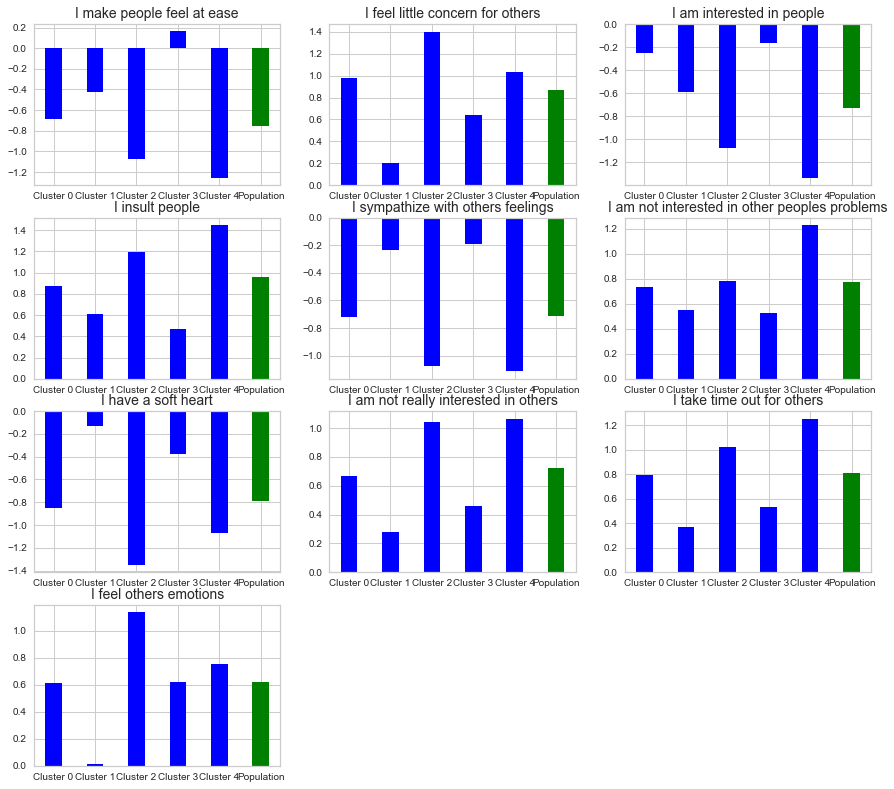

In [36]:
AGR_df_cluster = [column for column in df_cluster if column.startswith('AGR')]
print("Agreeableness Questions: Cluster Mean vs Population Mean comparison")
compare_two_graphs(AGR, agr_questions, df_cluster[AGR_df_cluster].values.transpose(), df[AGR_df_cluster].mean().transpose(), "Cluster", "Population Mean")

Openness Questions: Cluster Mean vs Population Mean comparison


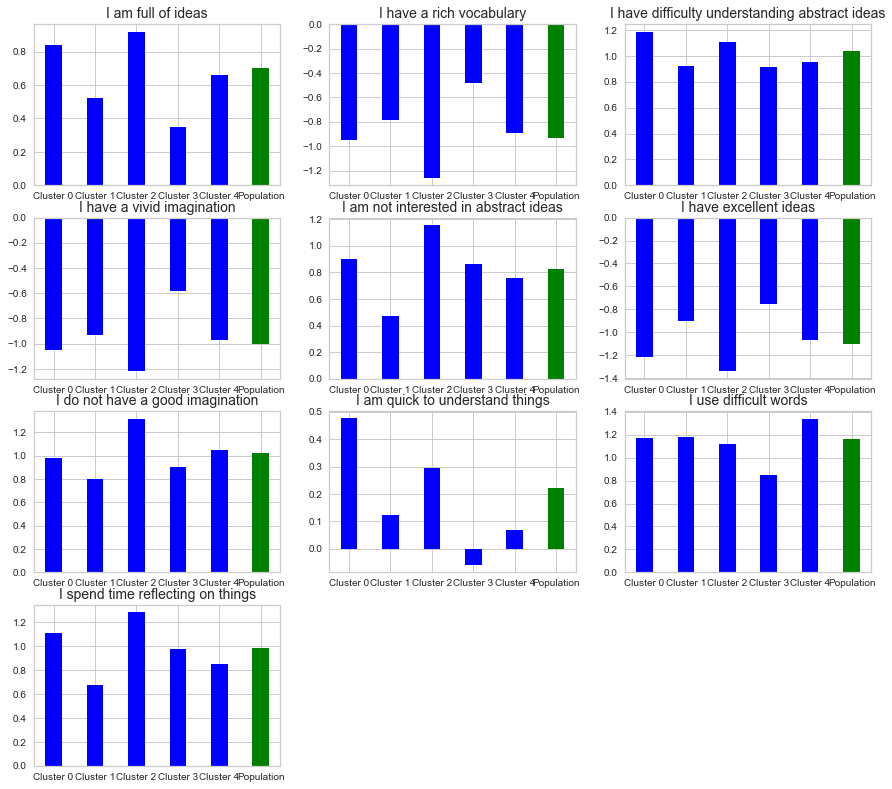

In [37]:
OPN_df_cluster = [column for column in df_cluster if column.startswith('OPN')]
print("Openness Questions: Cluster Mean vs Population Mean comparison")
compare_two_graphs(OPN, opn_questions, df_cluster[OPN_df_cluster].values.transpose(), df[OPN_df_cluster].mean().transpose(), "Cluster", "Population Mean")